In [77]:
import numpy as np
import pandas as pd

In [78]:
#01. 데이터 불러오기
df_2010 = pd.read_csv('data/2010년 드라마.csv',encoding='cp949',engine='python')
df_2011 = pd.read_csv('data/2011년 드라마.csv',encoding='cp949',engine='python')
df_2012 = pd.read_csv('data/2012년 드라마.csv',encoding='cp949',engine='python')
df_2013 = pd.read_csv('data/2013년 드라마.csv',encoding='cp949',engine='python')
df_2014 = pd.read_csv('data/2014년 드라마.csv',encoding='cp949',engine='python')
df_2015 = pd.read_csv('data/2015년 드라마.csv',encoding='cp949',engine='python')
df_2016 = pd.read_csv('data/2016년 드라마.csv',encoding='cp949',engine='python')
df_2017 = pd.read_csv('data/2017년 드라마.csv',encoding='cp949',engine='python')
df_2018 = pd.read_csv('data/2018년 드라마.csv',encoding='cp949',engine='python')
df_2019 = pd.read_csv('data/2019년 드라마.csv',encoding='cp949',engine='python')
df_2020 = pd.read_csv('data/2020년 드라마.csv',encoding='cp949',engine='python')

In [79]:
df_2020.shape

(84, 30)

In [80]:
df = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

In [81]:
df = df[['드라마 이름','방송사','방송기간','총 부작','요일 및 시간','시청률','방송갯수_1','영화갯수_1','방송갯수_2','영화갯수_2',\
       '방송갯수_3','영화갯수_3','방송갯수_4','영화갯수_4','방송갯수_5','영화갯수_5','드라마활동건수','영화활동건수',\
       '드라마활동건수.1','영화활동건수.1','장르']]

### 결측치 

In [82]:
# 경고 메세지 숨기기
import warnings
warnings.filterwarnings(action='ignore') 

In [83]:
df.columns

Index(['드라마 이름', '방송사', '방송기간', '총 부작', '요일 및 시간', '시청률', '방송갯수_1', '영화갯수_1',
       '방송갯수_2', '영화갯수_2', '방송갯수_3', '영화갯수_3', '방송갯수_4', '영화갯수_4', '방송갯수_5',
       '영화갯수_5', '드라마활동건수', '영화활동건수', '드라마활동건수.1', '영화활동건수.1', '장르'],
      dtype='object')

In [87]:
# 결측값 0으로 채우기 : 영화, 방송 수
df.iloc[:,6:20] = df.iloc[:,6:20].fillna(0)
# df.iloc[:,6:20]

In [88]:
df.dropna(inplace=True)

In [89]:
df = df.reset_index()
df = df.drop('index',axis=1)

### 전처리
- 총 부작 : 연속형
- 배우 5명 방송, 영화 평균
- 더미변수 : 방송사, 요일및시간, 장르

In [90]:
df['총 부작'] = df['총 부작'].str.replace('부작','').astype(int)

In [91]:
df['배우_방송'] = np.mean(df[['방송갯수_1','방송갯수_2','방송갯수_3','방송갯수_4','방송갯수_5']],axis=1)
df['배우_영화'] = np.mean(df[['영화갯수_1','영화갯수_2','영화갯수_3','영화갯수_4','영화갯수_5']],axis=1)

In [92]:
df['시청률'] = df['시청률'].str[1:-2]
# df['시청률'] 

In [93]:
df.index[df['시청률'] == ''],

(Int64Index([260, 451, 474, 483, 498], dtype='int64'),)

In [94]:
df.drop(df.index[df['시청률'] == ''],inplace=True)

In [95]:
df = df.reset_index()
df = df.drop('index',axis=1)

In [97]:
# 시청률 평균 => 리스트에 있는 값들을 평균내기
df['평균시청률'] = None

for i in range(0,len(df)) : 
    df['평균시청률'][i] = np.mean(list(map(float,df['시청률'][i].replace("'","").split(','))))

In [98]:
df['평균시청률'] = df['평균시청률'].astype(float)

### 기온, 강수량, 대회여부 처리

In [99]:
df['start'] = df['방송기간'].str.split('~').str[0]
df['end'] = df['방송기간'].str.split('~').str[1]

In [100]:
df['start'] = df['start'].str.replace('.','-').str[:10]
df['end'] = df['end'].str.replace('.','-').str[:11]

In [101]:
rain = pd.read_csv('전국_강수량_2010_2020.csv',skiprows=7, encoding='cp949')
temp = pd.read_csv('전국_기온_2010_2020.csv',skiprows=7, encoding='cp949')

In [102]:
rain_temp = pd.concat([rain,temp.iloc[:,2:]],axis=1)
rain_temp

,날짜,지점,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,전국,0.0,-4.9,-11.0,0.9
1,2010-01-02,전국,0.8,-0.1,-5.5,5.5
2,2010-01-03,전국,0.0,-2.9,-6.9,1.4
3,2010-01-04,전국,5.9,-1.8,-5.1,2.2
4,2010-01-05,전국,0.7,-5.2,-8.7,-1.8
...,...,...,...,...,...,...
4013,2020-12-27,전국,2.2,3.6,-0.6,8.3
4014,2020-12-28,전국,0.1,4.6,-0.1,12.2
4015,2020-12-29,전국,1.8,2.3,-2.1,8.8
4016,2020-12-30,전국,1.2,-6.5,-9.3,-0.9


In [103]:
rain_temp.columns = ['날짜', '지점', '강수량', '평균기온', '최저기온', '최고기온']

In [104]:
rain_temp['날짜'] = pd.to_datetime(rain_temp['날짜'])

In [105]:
df = df.dropna()
df.isnull().sum()

드라마 이름       0
방송사          0
방송기간         0
총 부작         0
요일 및 시간      0
시청률          0
방송갯수_1       0
영화갯수_1       0
방송갯수_2       0
영화갯수_2       0
방송갯수_3       0
영화갯수_3       0
방송갯수_4       0
영화갯수_4       0
방송갯수_5       0
영화갯수_5       0
드라마활동건수      0
영화활동건수       0
드라마활동건수.1    0
영화활동건수.1     0
장르           0
배우_방송        0
배우_영화        0
평균시청률        0
start        0
end          0
dtype: int64

In [106]:
df = df.reset_index()
df = df.drop('index',axis=1)

In [107]:
# 대회 정보
com_info = pd.DataFrame (
    data={'start': ['2018-08-18','2018-06-14','2018-02-09','2016-08-05','2014-09-19','2014-06-12',
                   '2014-02-07','2012-07-27','2010-11-12','2010-06-11','2010-02-12'],
          'end' : ['2018-09-02','2018-07-15','2018-02-25','2016-08-21','2014-10-04','2014-07-13',
                  '2014-02-23','2012-08-12','2010-11-27','2010-07-11','2010-02-28']},
    index=['제18회 자카르타-팔렘방 아시안게임','2018 러시아 월드컵','제23회 대한민국 평창 동계 올림픽',
           '제31회 리우데자네이루 올림픽','제17회 인천 아시안게임','2014 브라질 월드컵',
           '제22회 소치 동계올림픽','제30회 런던 올림픽','제16회 광저우 아시안게임',
           '2010 남아프리카공화국 월드컵','제21회 밴쿠버 동계올림픽'],
     columns=['start','end'])

In [108]:
com_info['start'] = pd.to_datetime(com_info['start'])
com_info['end'] = pd.to_datetime(com_info['end'])

In [109]:
competition = []
for n in range(0,11) :
    competition.append(pd.date_range(start=com_info['start'][n], end=com_info['end'][n]))
# competition

In [110]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

df['강수량'] = None
df['기온'] = None
df['스포츠 대회'] = None
# 드라마 개수
for i in range(0,len(df)) : 
#     print(i)
    dd = pd.date_range(start=df['start'][i], end=df['end'][i])
    
    df['강수량'][i] = np.mean(rain_temp[rain_temp['날짜'].isin(dd)==True]['강수량'])
    df['기온'][i] = np.mean(rain_temp[rain_temp['날짜'].isin(dd)==True]['평균기온'])
    
    val = sum(competition[0].isin(dd)==True) + sum(competition[1].isin(dd)==True) + sum(competition[3].isin(dd)==True ) + \
          sum(competition[4].isin(dd)==True) + sum(competition[5].isin(dd)==True) + sum(competition[6].isin(dd)==True) + \
          sum(competition[7].isin(dd)==True) + sum(competition[8].isin(dd)==True) + sum(competition[9].isin(dd)==True) + \
          sum(competition[10].isin(dd)==True) >= 1   
#     print(val)
    if val == True : 
        df['스포츠 대회'][i] = 1
    else : 
        df['스포츠 대회'][i] = 0


In [111]:
df.columns

Index(['드라마 이름', '방송사', '방송기간', '총 부작', '요일 및 시간', '시청률', '방송갯수_1', '영화갯수_1',
       '방송갯수_2', '영화갯수_2', '방송갯수_3', '영화갯수_3', '방송갯수_4', '영화갯수_4', '방송갯수_5',
       '영화갯수_5', '드라마활동건수', '영화활동건수', '드라마활동건수.1', '영화활동건수.1', '장르', '배우_방송',
       '배우_영화', '평균시청률', 'start', 'end', '강수량', '기온', '스포츠 대회'],
      dtype='object')

In [112]:
df = df[['방송사','총 부작','요일 및 시간','배우_방송','배우_영화','드라마활동건수','영화활동건수','드라마활동건수.1',
         '영화활동건수.1','강수량','기온','스포츠 대회','장르','평균시청률']]
df.columns = ['방송사','부작','요일시간','배우_방송','배우_영화','연출_드라마','연출_영화','작가_드라마',
              '작가_영화','강수량','기온','스포츠 대회','장르','평균시청률']

In [115]:
df['강수량'] = df['강수량'].astype(float)
df['기온'] = df['기온'].astype(float)

In [116]:
df

,방송사,부작,요일시간,배우_방송,배우_영화,연출_드라마,연출_영화,작가_드라마,작가_영화,강수량,기온,스포츠 대회,장르,평균시청률
0,MBC,210,22B,38.6,8.8,13.0,0.0,11.0,1.0,4.701278,11.741214,1,시트콤,9.510000
1,KBS1,60,24C,29.8,8.0,10.0,0.0,12.0,1.0,1.781951,5.239024,1,사극,10.943333
2,KBS1,159,22B,28.0,6.2,12.0,0.0,8.0,0.0,1.636486,5.548649,1,드라마,39.346667
3,SBS,124,22B,43.0,14.2,14.0,0.0,8.0,0.0,1.875000,3.930000,1,드라마,13.793333
4,KBS2,162,22A,20.0,10.4,10.0,0.0,5.0,5.0,1.304787,3.648936,1,"코메디, 멜로, 드라마",9.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,tvN,12,3C,26.0,16.4,3.0,12.0,2.0,19.0,1.959459,5.497297,0,서스펜스,4.233333
974,MBC,32,9C,34.4,12.4,9.0,0.0,3.0,0.0,1.927451,4.427451,0,수사물,3.450000
975,tvN,16,9C,17.2,26.0,16.0,0.0,0.0,0.0,1.678431,3.676471,0,드라마,1.981250
976,SBS,16,3C,11.6,9.6,16.0,0.0,17.0,0.0,2.692157,3.205882,0,"메디컬, 로맨스",20.218750


### 시각화

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   방송사     978 non-null    object 
 1   부작      978 non-null    int32  
 2   요일시간    978 non-null    object 
 3   배우_방송   978 non-null    float64
 4   배우_영화   978 non-null    float64
 5   연출_드라마  978 non-null    float64
 6   연출_영화   978 non-null    float64
 7   작가_드라마  978 non-null    float64
 8   작가_영화   978 non-null    float64
 9   강수량     978 non-null    float64
 10  기온      978 non-null    float64
 11  스포츠 대회  978 non-null    object 
 12  장르      978 non-null    object 
 13  평균시청률   978 non-null    float64
dtypes: float64(9), int32(1), object(4)
memory usage: 103.3+ KB


In [223]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(['seaborn-whitegrid'])

%matplotlib inline
#  한글글꼴로 변경
import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# 음수 표시 에러 
mpl.rcParams['axes.unicode_minus'] = False

### 색상

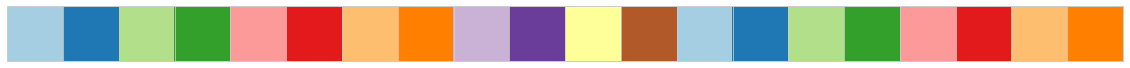

In [120]:
custom_palette = sns.color_palette("Paired", 20)
sns.palplot(custom_palette)

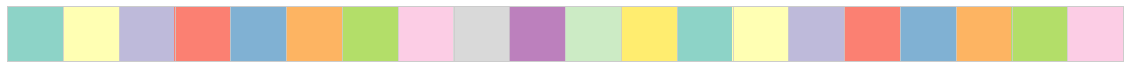

In [121]:
qualitative_colors = sns.color_palette("Set3", 20)
sns.palplot(qualitative_colors)

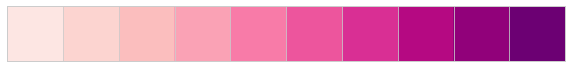

In [122]:
sequential_colors = sns.color_palette("RdPu", 10)
sns.palplot(sequential_colors)

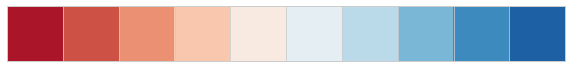

In [123]:
diverging_colors = sns.color_palette("RdBu", 10)
sns.palplot(diverging_colors)

In [124]:
sns.set_palette("Paired") 
# deep, muted, pastel, bright, dark, colorblind

### 01. 변수별 분포

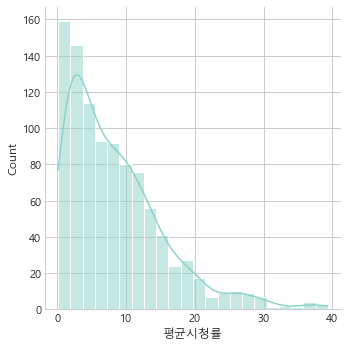

In [224]:
# 시청률
# sns.set_theme(style="whitegrid")
sns.displot(df['평균시청률'],kde=True,color=qualitative_colors[0]);

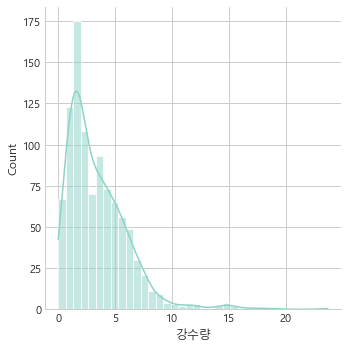

In [225]:
# 강수량
sns.displot(df['강수량'],kde=True,color=qualitative_colors[0]);

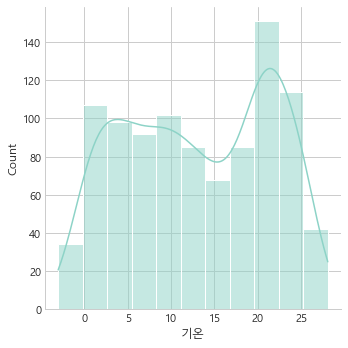

In [226]:
# 기온
sns.displot(df['기온'],kde=True,color=qualitative_colors[0]);

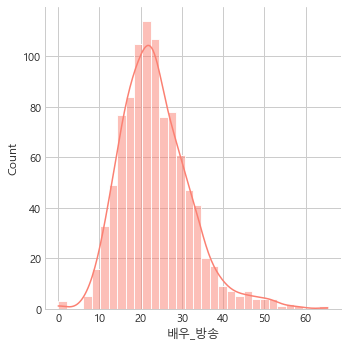

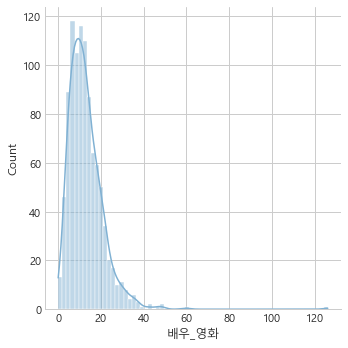

In [227]:
# 배우_방송 / 배우_영화
sns.displot(df['배우_방송'],kde=True,color=qualitative_colors[3]);
sns.displot(df['배우_영화'],kde=True,color=qualitative_colors[4]);

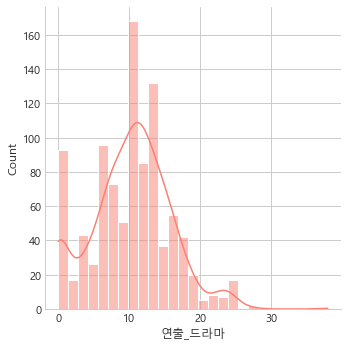

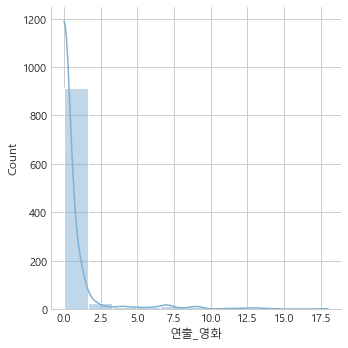

In [228]:
# 연출자_방송 / 연출자_영화
sns.displot(df['연출_드라마'],kde=True,color=qualitative_colors[3]);
sns.displot(df['연출_영화'],kde=True,color=qualitative_colors[4]);

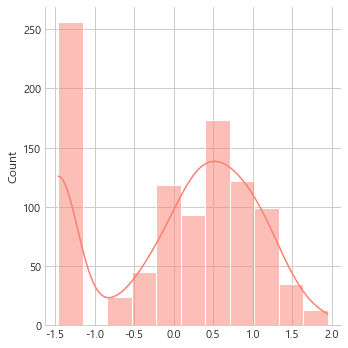

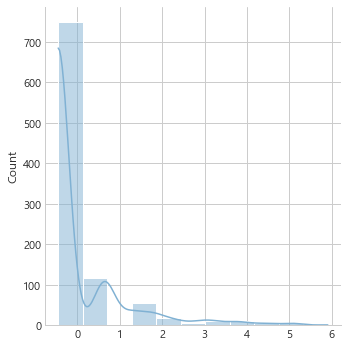

In [229]:
# 작가_방송 / 작가_영화
import math
from sklearn import preprocessing
 # 로그 변환
sns.displot(preprocessing.scale(np.log(df['작가_드라마']+1)),kde=True,color=qualitative_colors[3]);
sns.displot(preprocessing.scale(np.log(df['작가_영화']+1)),kde=True,color=qualitative_colors[4]);

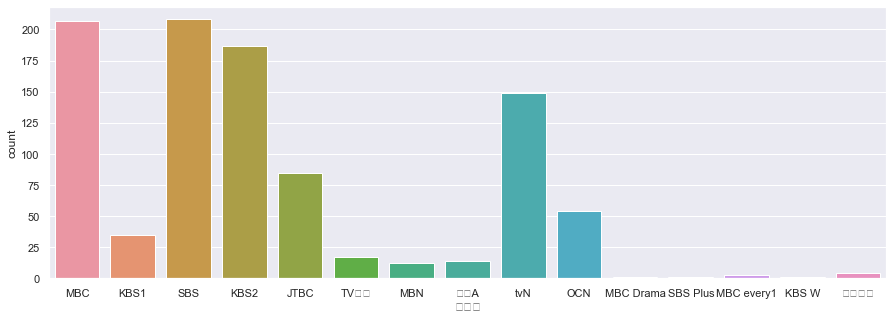

In [236]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x="방송사", data=df);

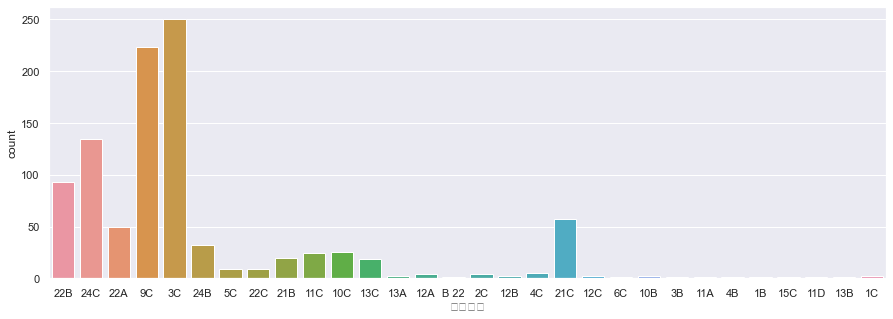

In [231]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x="요일시간", data=df);

### 02. 범주형변수와 시청률

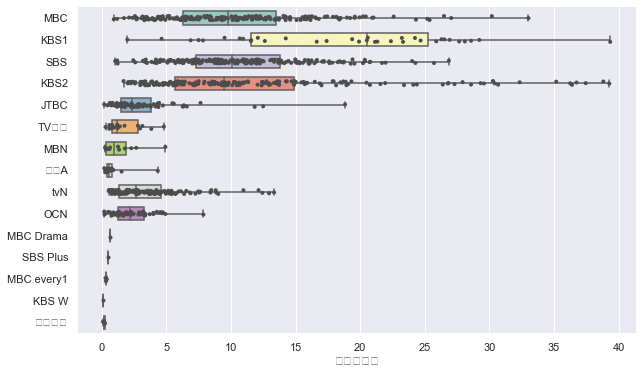

In [109]:
## box plot
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
# ax.set_xscale("log")
# Plot the orbital period with horizontal boxes
sns.boxplot(x='평균시청률', y='방송사', data=df,
            whis=[0, 100], width=.6, palette=qualitative_colors);
# Add in points to show each observation
sns.stripplot(x="평균시청률", y="방송사", data=df,
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

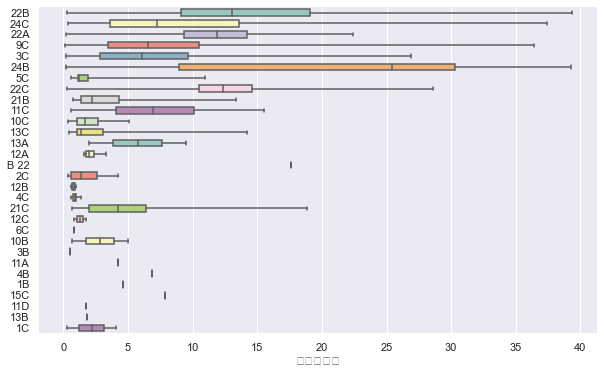

In [108]:
## box plot
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
# ax.set_xscale("log")
# Plot the orbital period with horizontal boxes
sns.boxplot(x='평균시청률', y='요일시간', data=df,
            whis=[0, 100], width=.6, palette=qualitative_colors);
# Add in points to show each observation
# sns.stripplot(x="평균시청률", y="요일시간", data=df,
#               size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### 연속형 변수와 시청률

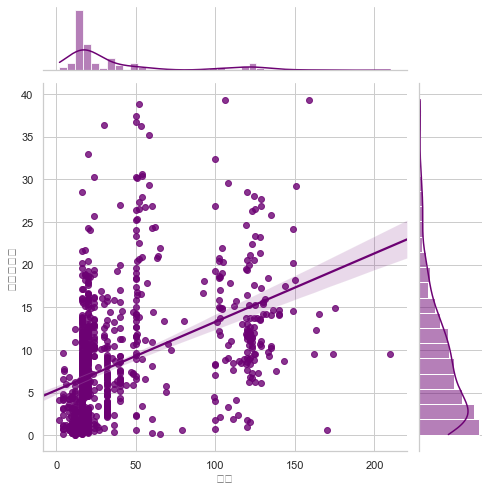

In [124]:
# scatter plot 
sns.set_theme(style="whitegrid")

sns.jointplot(x="부작", y="평균시청률", data=df,
              kind="reg", truncate=False,
              color=sequential_colors[9], height=7)

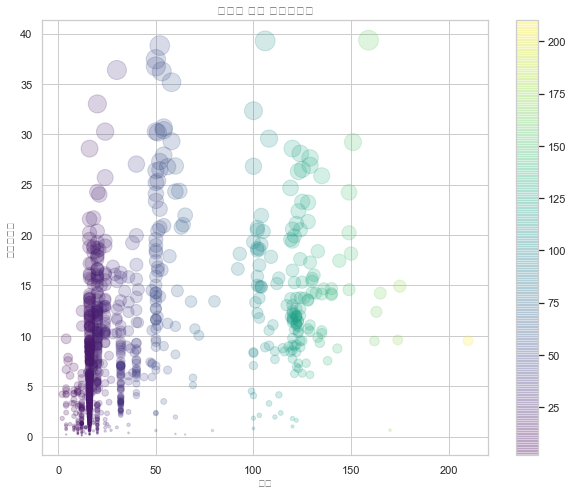

In [206]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(df.부작, # x
           df.평균시청률, # y
           alpha=0.2, 
           s=10*df.평균시청률, # marker size
           c=df.부작, # marker color
           cmap='viridis')
plt.title('부작에 대한 평균시청률', fontsize=12)
plt.xlabel('부작', fontsize=10)
plt.ylabel('평균시청률', fontsize=10)
plt.colorbar()
plt.show();

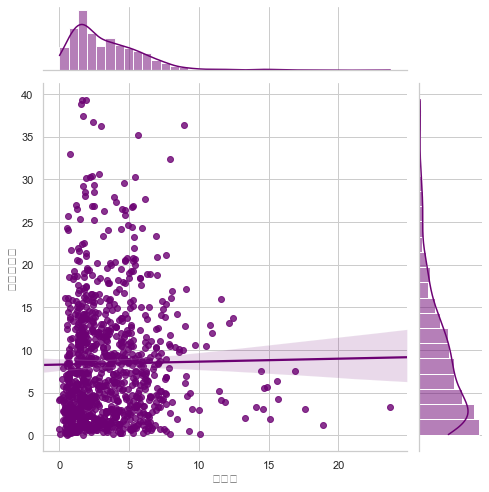

In [205]:
sns.jointplot(x="강수량", y="평균시청률", data=df,
                  kind="reg", truncate=False,
                  color=sequential_colors[9], height=7);

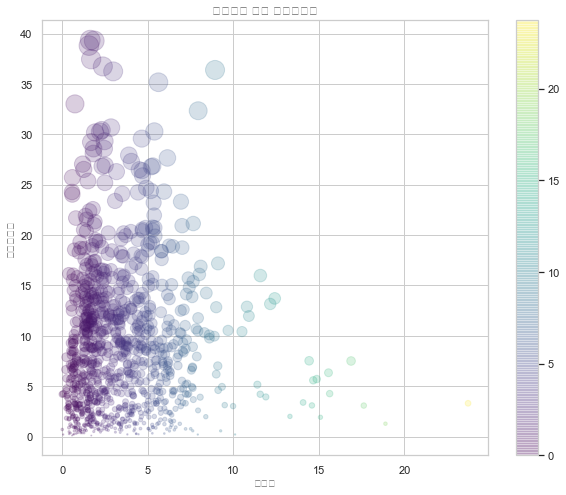

In [204]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(df.강수량, # x
           df.평균시청률, # y
           alpha=0.2, 
           s=10*df.평균시청률, # marker size
           c=df.강수량, # marker color
           cmap='viridis')
plt.title('강수량에 대한 평균시청률', fontsize=12)
plt.xlabel('강수량', fontsize=10)
plt.ylabel('평균시청률', fontsize=10)
plt.colorbar()
plt.show();

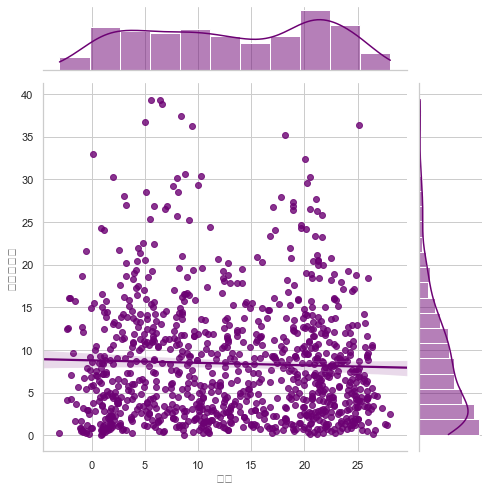

In [203]:
sns.jointplot(x="기온", y="평균시청률", data=df,
                  kind="reg", truncate=False,
                  color=sequential_colors[9], height=7);

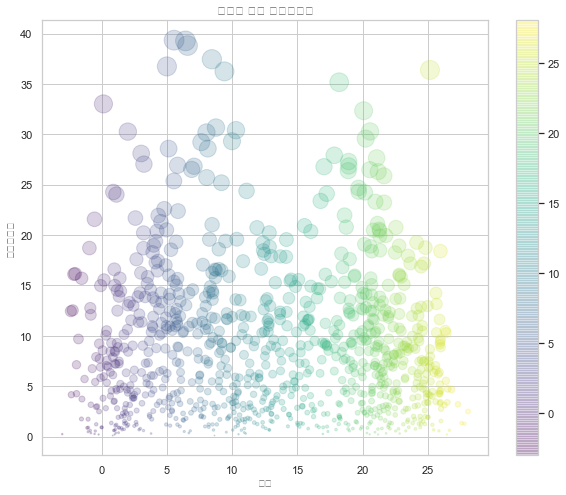

In [200]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(df.기온, # x
           df.평균시청률, # y
           alpha=0.2, 
           s=10*df.평균시청률, # marker size
           c=df.기온, # marker color
           cmap='viridis')
plt.title('기온에 대한 평균시청률', fontsize=12)
plt.xlabel('기온', fontsize=10)
plt.ylabel('평균시청률', fontsize=10)
plt.colorbar()
plt.show();

### 연속형 변수, 범주형 변수와 시청률

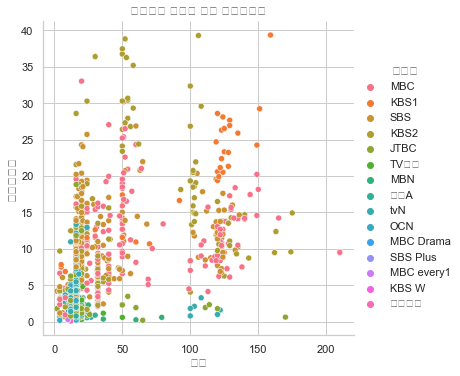

In [237]:
# scatter plot - 방송사, 요일시간, 장르
sns.set_theme(style="whitegrid")
sns.relplot(data=df, x="부작", y="평균시청률",hue="방송사")
plt.title("방송사별 부작에 대한 평균시청률", fontsize=12);

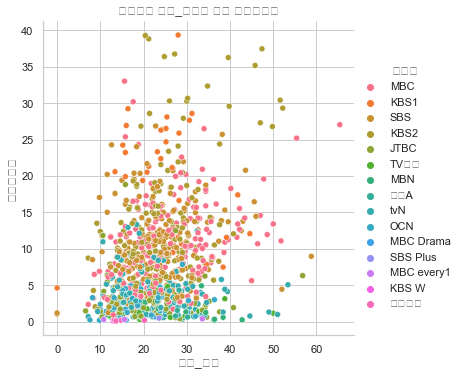

In [238]:
sns.relplot(data=df, x="배우_방송", y="평균시청률",hue="방송사")
plt.title("방송사별 배우_방송에 대한 평균시청률");

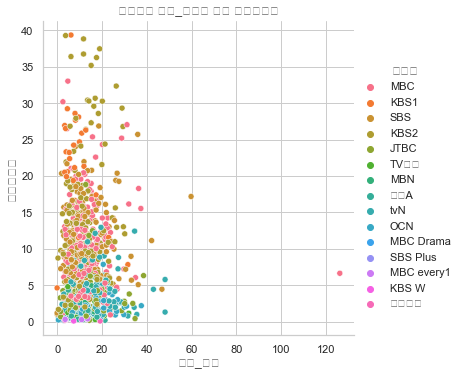

In [239]:
# sns.set_theme(style="whitegrid")
sns.relplot(data=df, x="배우_영화", y="평균시청률",hue="방송사")
plt.title("방송사별 배우_영화에 대한 평균시청률");

In [ ]:
sns.relplot(data=df, x="연출_드라마", y="평균시청률",hue="방송사")
plt.title("방송사별 배우_영화에 대한 평균시청률");

In [ ]:
sns.relplot(data=df, x="연출_영화", y="평균시청률",hue="방송사")
plt.title("방송사별 배우_영화에 대한 평균시청률");

In [ ]:
sns.relplot(data=df, x="작가_드라마", y="평균시청률",hue="방송사")
plt.title("방송사별 배우_영화에 대한 평균시청률");

In [ ]:
sns.relplot(data=df, x="작가_영화", y="평균시청률",hue="방송사")
plt.title("방송사별 배우_영화에 대한 평균시청률");

In [ ]:
## hue를 요일시간으로
## hue를 스포츠 대회로

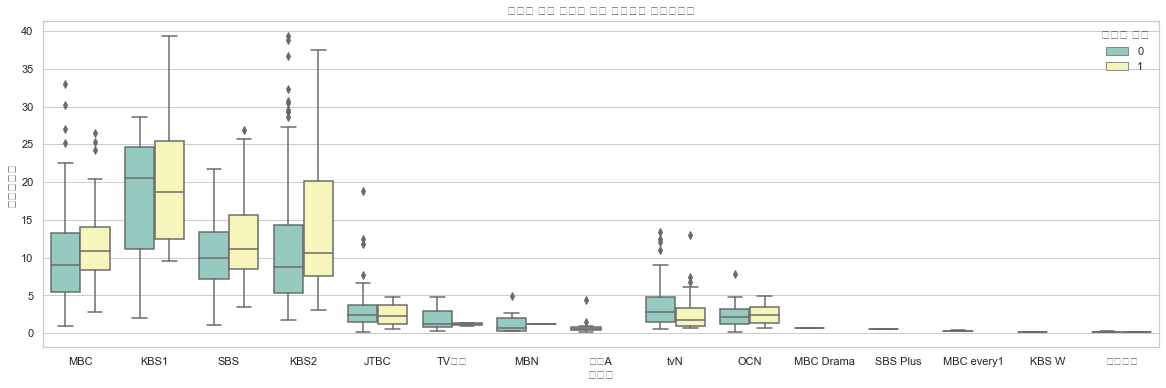

In [193]:
plt.figure(figsize=(20, 6))
plt.title("스포츠 대회 여부에 따른 방송사별 평균시청률")
sns.boxplot(x='방송사',y='평균시청률',data=df,
            hue='스포츠 대회',palette='Set3');

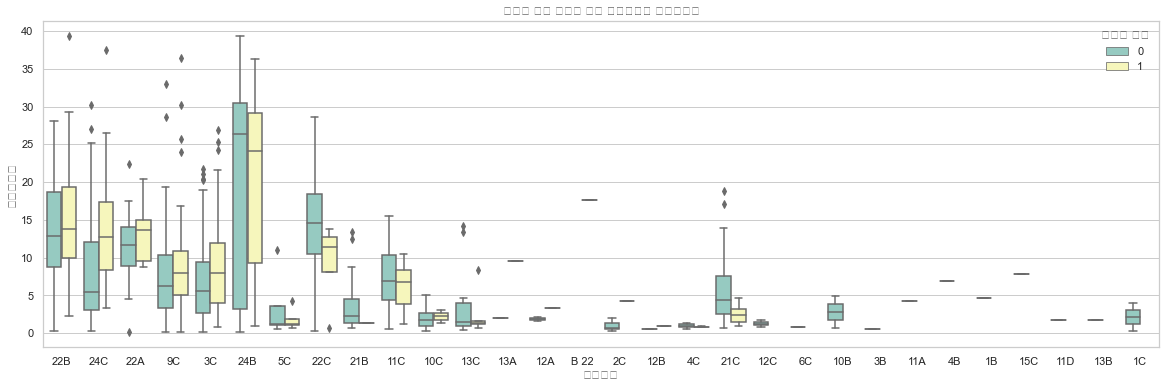

In [192]:
plt.figure(figsize=(20, 6))
plt.title("스포츠 대회 여부에 따른 요일시간별 평균시청률")
sns.boxplot(x='요일시간',y='평균시청률',data=df,
            hue='스포츠 대회',palette='Set3');

### 더미화

In [161]:
drama_genre_set = sorted(set.union(*(set(x.split(',')) for x in df.장르)))
drama_time_set = pd.get_dummies(df['요일시간'], prefix = '요일시간')
drama_broadcast = pd.get_dummies(df['방송사'], prefix = '방송사')
com_dummy =  pd.get_dummies(df['스포츠 대회'], prefix = '스포츠 대회')

In [162]:
indicator_mat = pd.DataFrame(np.zeros((len(df), len(drama_genre_set))),columns=drama_genre_set)

In [163]:
for i, genre in enumerate(df.장르):
#     print(i,genre)
    indicator_mat.loc[i, genre.split(',')]=1

In [174]:
drama_mat = pd.concat([df[['평균시청률','배우_방송','배우_영화','연출_드라마','연출_영화','작가_드라마',
                          '작가_영화','부작','강수량','기온']],drama_time_set,drama_broadcast,com_dummy],axis=1)
drama_mat = drama_mat.join(indicator_mat.add_prefix('genre_'))

In [164]:
genre_mat = pd.DataFrame(df['평균시청률']).join(indicator_mat.add_prefix('genre_'))
time_mat = pd.concat([df['평균시청률'],drama_time_set],axis=1)
broadcast_mat = pd.concat([df['평균시청률'],drama_broadcast],axis=1)
competition_mat = pd.concat([df['평균시청률'],com_dummy],axis=1)

### 변수간 상관관계

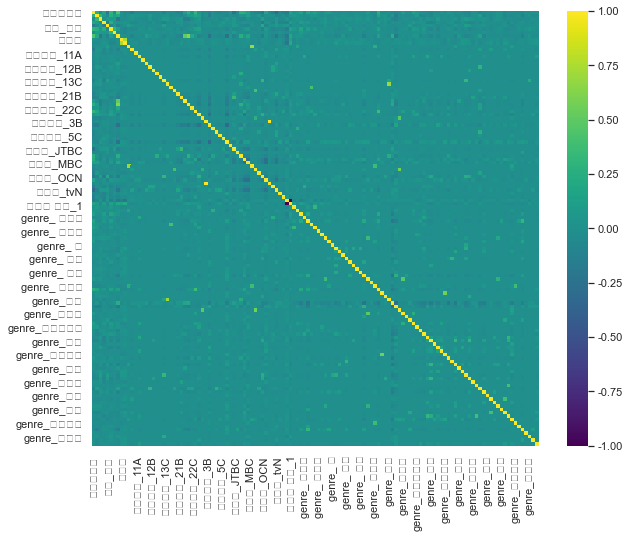

In [175]:
# heat map 
sns.heatmap(drama_mat.corr(), annot = False, cmap = 'viridis');

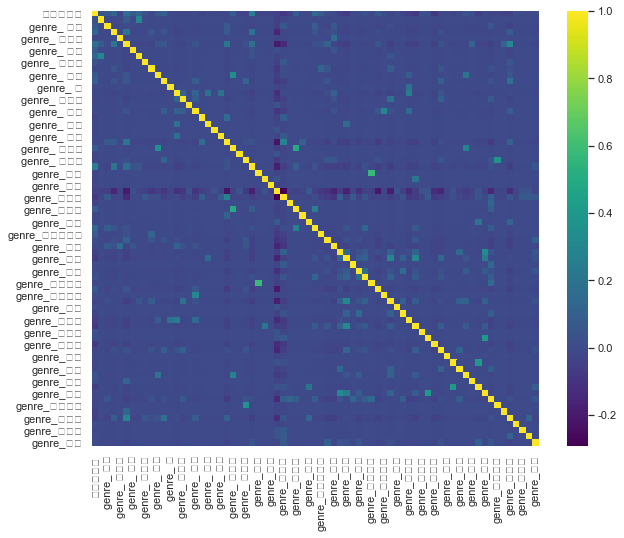

In [186]:
sns.heatmap(genre_mat.corr(), annot = False, cmap = 'viridis');

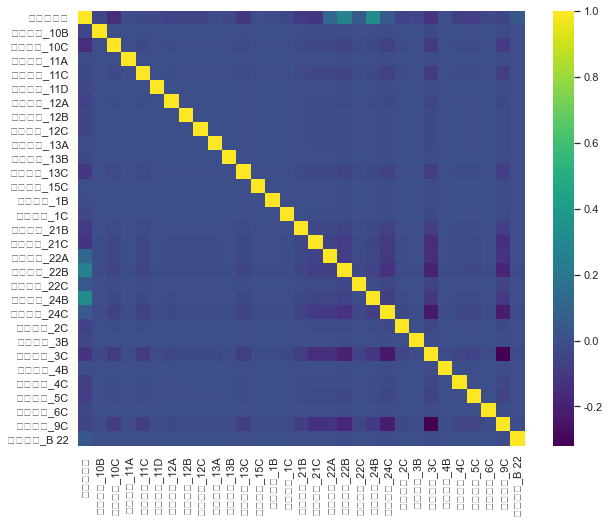

In [170]:
sns.heatmap(time_mat.corr(), annot = False, cmap = 'viridis');

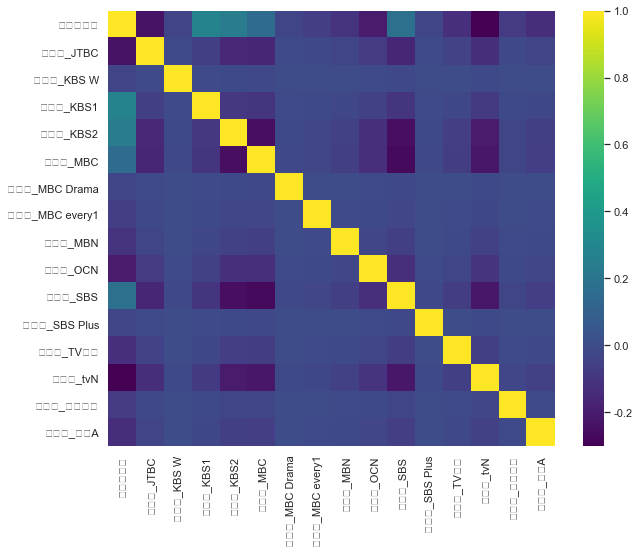

In [176]:
sns.heatmap(broadcast_mat.corr(), annot = False, cmap = 'viridis');

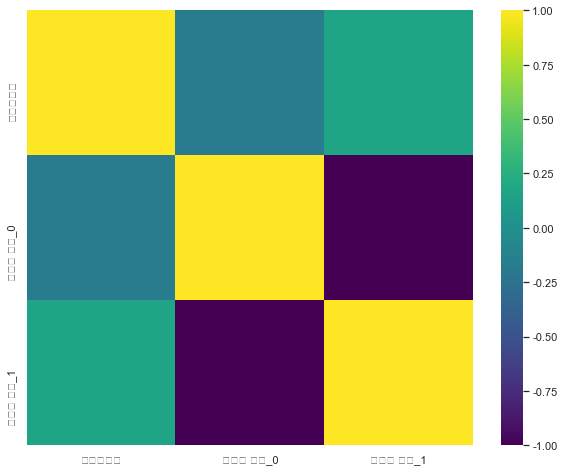

In [173]:
sns.heatmap(competition_mat.corr(), annot = False, cmap = 'viridis');